In [1]:
import cv2 as cv
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import task01

In [2]:
def display_image(window_name, img, window_1_name=None, img_1=None):
    """
    Displays image with given window name.
    :param window_name: name of the window
    :param img: image object to display
    """
    if window_1_name is not None and img_1 is not None:
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(img, cmap="gray")
        plt.title(window_name)
        plt.subplot(1, 2, 2)
        plt.imshow(img_1, cmap="gray")
        plt.title(window_1_name)
    else:
        plt.imshow(img, cmap="gray")
        plt.title(window_name)
        plt.show()

In [117]:
def display_image_with_snake(img, V, index):
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(121)
    ax.imshow(img, cmap='gray')
    ax.set_title("frame " + str(index))
    task01.plot_snake(ax, V)
    plt.show()
    return [ax]

def display_image_with_energy(img, V, E_ext):
    fig = plt.figure(figsize=(15, 7))
    ax = fig.add_subplot(121)
    ax.imshow(img, cmap='gray')
    ax.set_title("initial state")
    task01.plot_snake(ax, V)
    ax = fig.add_subplot(122)
    ax.imshow(E_ext)
    ax.set_title("External energy visualization")
    # add colorbar
    plt.colorbar(ax.get_children()[0], ax=ax)


# Sheet 4

## Task 1
Read the images ball.png and coffee.png and segment the object in both images using snakes. <br> Initialize the snake by a circle around the object and optimize it using dynamic programming.<br>  The elastic term should be used as pairwise cost, penalizing deviation from the average distance between pairs of nodes. <br> Visualize for both images how the snake converges to the boundary of the object.

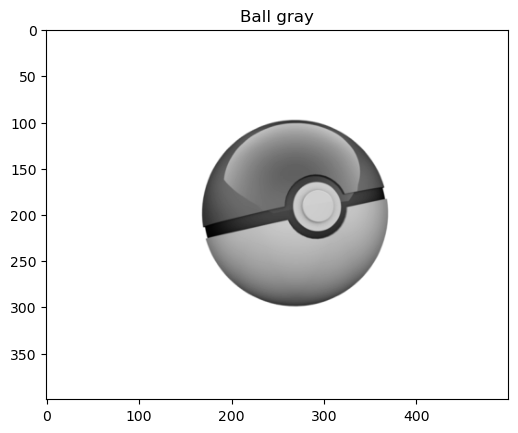

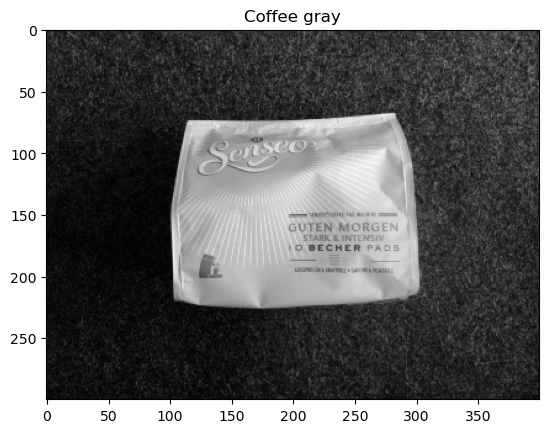

In [4]:
import task01

ball_path = "images/ball.png"
coffee_path = "images/coffee.png"

img_ball, V = task01.load_data(ball_path, 120)
img_coffee, V = task01.load_data(coffee_path, 100)
display_image('Ball gray', img_ball)
display_image('Coffee gray', img_coffee)

Calculate External Energy

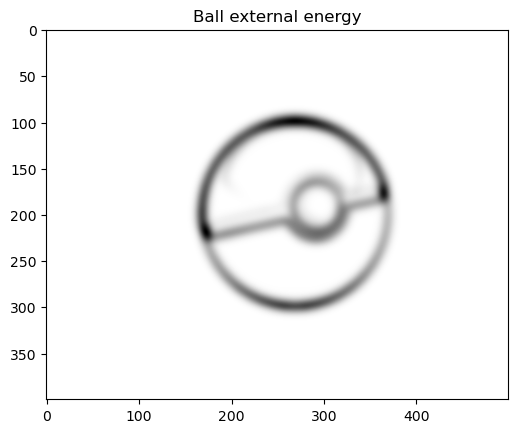

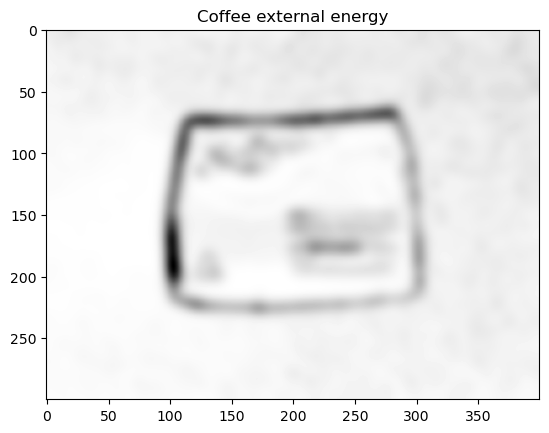

In [5]:
E_ext_ball = task01.calculate_external_energy(img_ball)
display_image('Ball external energy', E_ext_ball)

E_ext_coffee = task01.calculate_external_energy(img_coffee)
display_image('Coffee external energy', E_ext_coffee)

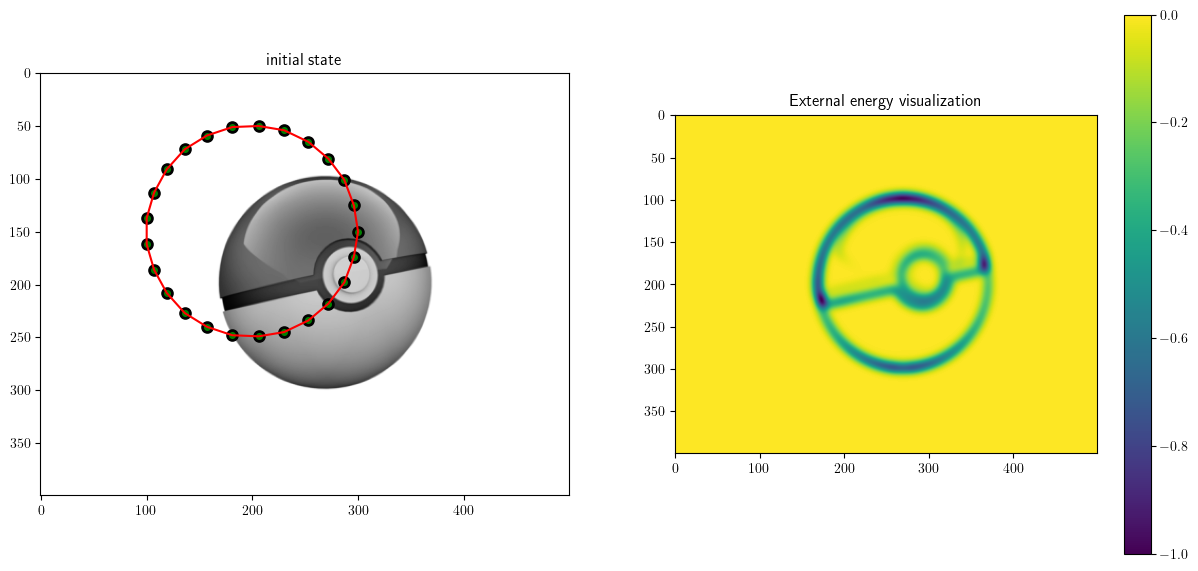

In [118]:
display_image_with_energy(img_ball, V, E_ext_ball)

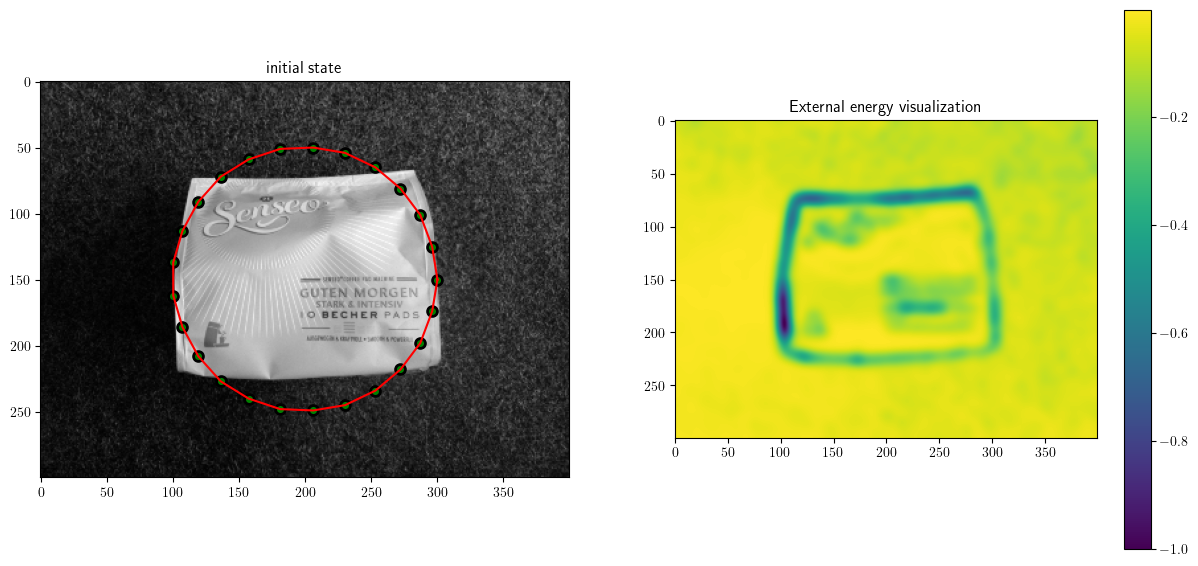

In [119]:
display_image_with_energy(img_coffee, V, E_ext_coffee)

In [9]:
def calculate_elasticity_of_pair(node1, node2, dist):
    """
    Calculates elasticity of the pair of nodes.
    :param node1: first node
    :param node2: second node
    :param dist: mean distance between all nodes
    :return: elasticity of the pair
    """
    return ((np.linalg.norm(node1 - node2) - dist) ** 2) 


def get_cost_matrix(E_ext, V, size, alpha, beta):
    """
    Calculates cost matrix for the given external energy and snake.
    :param E_ext: external energy
    :param V: snake
    :param size: size of the field with relative coordinates    
    :param alpha: elasticity coefficient
    :param beta: external energy coefficient
    :return: cost matrix
    """
    relative_positions = np.array([[x, y] for x in range(-(size//2), size//2 + 1) for y in range(-(size//2), size//2 + 1)])
    mean_dist = np.mean([np.linalg.norm(V[i] - V[i+1]) for i in range(0, len(V)-1)])

    num_states = relative_positions.shape[0]
    num_vertices = V.shape[0]



    cost_matrix = np.zeros((num_vertices, num_states), dtype=np.float32)

    backtracking_matrix = np.ones((num_vertices, num_states), dtype=np.int32) * -1
    
    for i, v in enumerate(V):
        for j, r_1 in enumerate(relative_positions):
            curr_pos = v + r_1
            U_ij = E_ext[curr_pos[1], curr_pos[0]] * beta
            #set cost to very small value with respect to Machine limits for floating point types. 
            #This is to avoid division by zero in the next step
            cost_matrix[i, j] = np.finfo(np.float32).max

            for k, r_2 in enumerate(relative_positions):
                prev_v = V[i-1] + r_2
                # calculate elasticity of the pair
                elast_ki = calculate_elasticity_of_pair(curr_pos, prev_v, mean_dist) * alpha
                # calculate cost
                cost = U_ij + elast_ki + cost_matrix[i-1, k]
                if cost < cost_matrix[i, j]:
                    cost_matrix[i, j] = cost
                    backtracking_matrix[i, j] = k

    return cost_matrix, backtracking_matrix


def backtrack(cost_matrix, backtracking_matrix):
    """
    Backtracks the cost matrix to find the best path.
    :param cost_matrix: cost matrix
    :param backtracking_matrix: backtracking matrix
    :return: best path
    """
    num_vertices = cost_matrix.shape[0]
    num_states = cost_matrix.shape[1]

    # find the best state for the last vertex
    best_state = np.argmin(cost_matrix[num_vertices-1])
    best_path = [best_state]
    for i in range(num_vertices-2, -1, -1):
        best_state = backtracking_matrix[i+1, best_state]
        assert best_state >= 0
        best_path.append(best_state)
    best_path.reverse()
    return best_path
   

In [120]:
def is_converged(V, V_prev, epsilon):
    """
    Checks if the snake has converged.
    :param V: current snake
    :param V_prev: previous snake
    :param epsilon: convergence threshold
    :return: True if converged, False otherwise
    """
    return (np.linalg.norm(V - V_prev, axis=0) < epsilon).all()


In [121]:
def run(fpath, radius):
    """ run experiment
    :param fpath:
    :param radius:
    :return:
    """
    Im, V = task01.load_data(fpath, radius)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    n_steps = 205
    alpha = 0.001
    beta = 1
    size = 3

    imgs = []


    # ------------------------
    # your implementation here

    # ------------------------
    # calculate external energy
    E_ext = task01.calculate_external_energy(Im)
    #calculate relative positions
    relative_positions = np.array([[x, y] for x in range(-(size//2), size//2 + 1) for y in range(-(size//2), size//2 + 1)])    
    prev_V = V
    for t in range(n_steps):
        # ------------------------
        # your implementation here

        # ------------------------
        # calculate cost matrix
        cost_matrix, backtracking_matrix = get_cost_matrix(E_ext, V, size, alpha, beta)
        # backtrack
        trace = backtrack(cost_matrix, backtracking_matrix)
        # update vertices
        new_V = []
        for i, v in zip(trace, V):
            v += relative_positions[i]
            new_V.append(v)
        new_V = np.array(new_V)
        
        V = new_V

        # the following lines do not show anything in my case (and I can't start .py file because of some error). So instead I show every 10th image.
        # sorry for that :(
        
        ax.clear()
        ax.imshow(Im, cmap='gray')
        ax.set_title('frame ' + str(t))
        task01.plot_snake(ax, V)
        
        plt.pause(0.05)
        

        # plt.imshow(E_ext, cmap="gray")
        # plt.title("frame " + str(t))
        # plt.show()
        if(t % 10 == 0):
            imgs.append(display_image_with_snake(Im, V, t))
    # ani = animation.ArtistAnimation(fig, imgs, interval=50, blit=True,
    #                             repeat_delay=100, repeat=True)
    # ani.save('animation.gif', writer='imagemagick', fps=30)    

    # plt.pause(2)

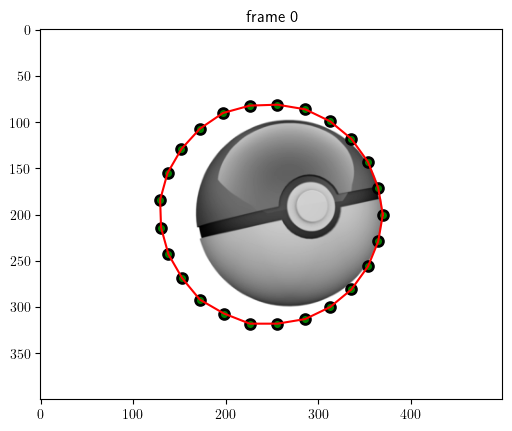

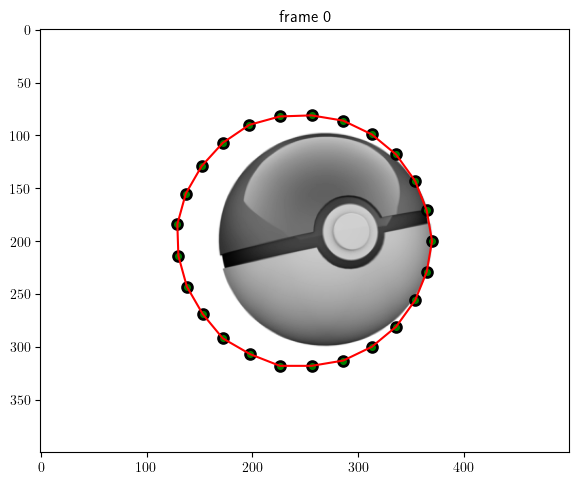

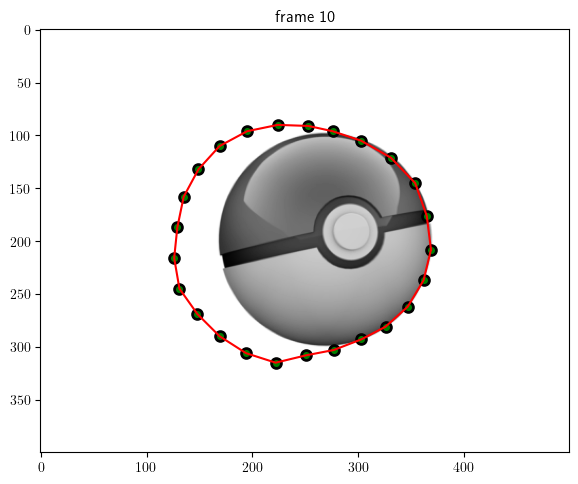

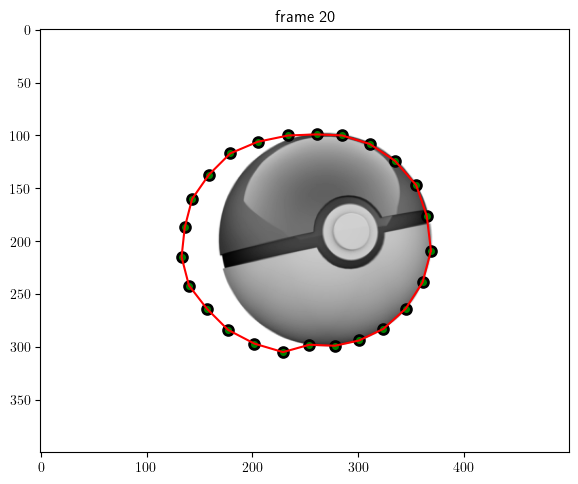

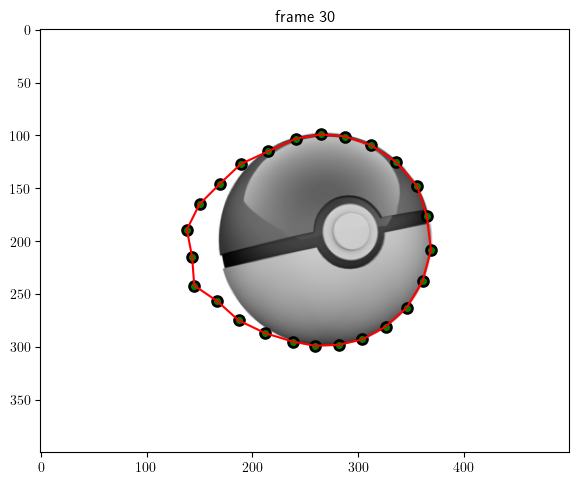

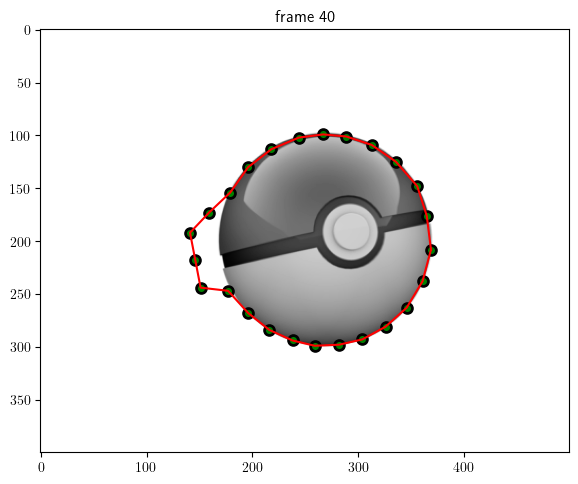

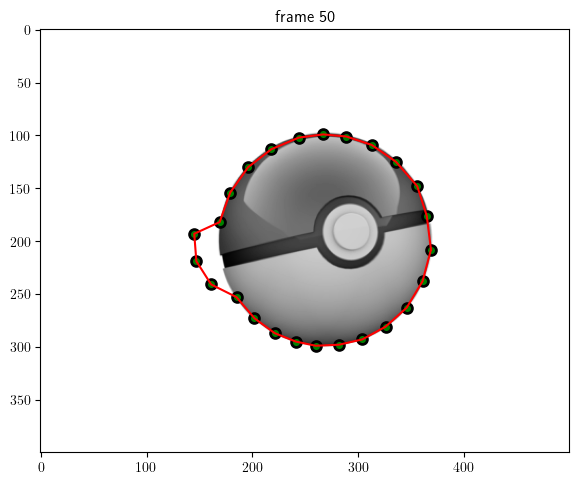

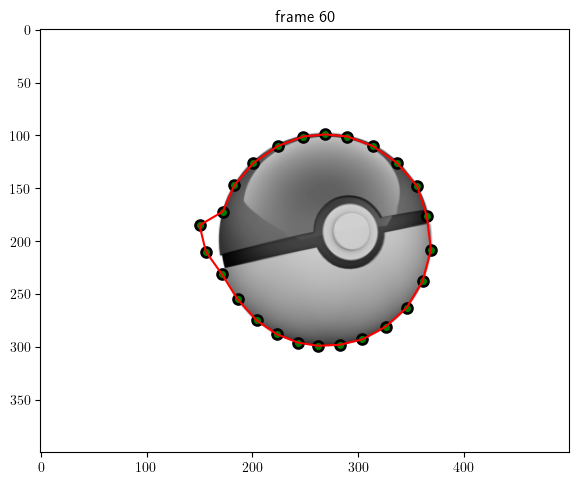

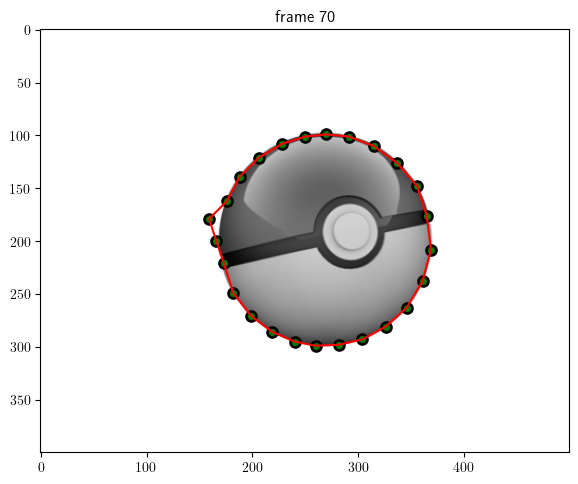

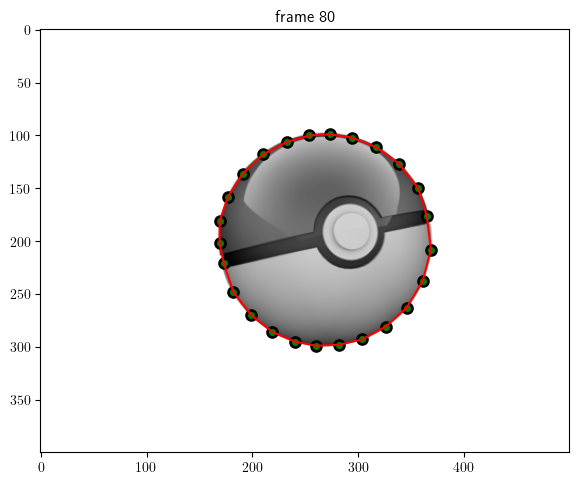

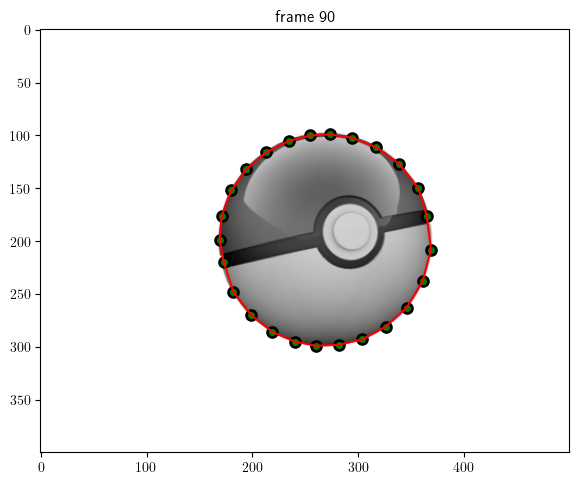

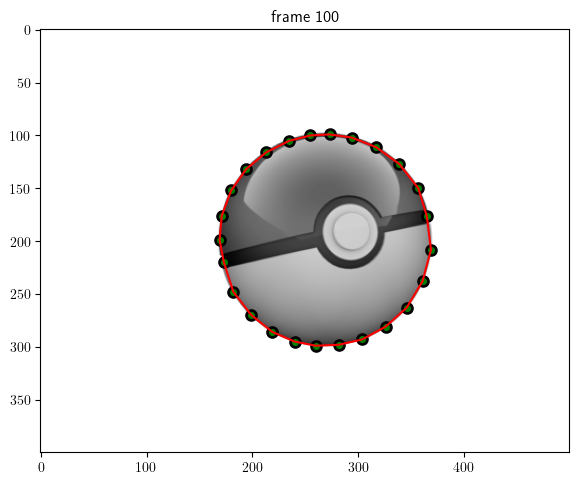

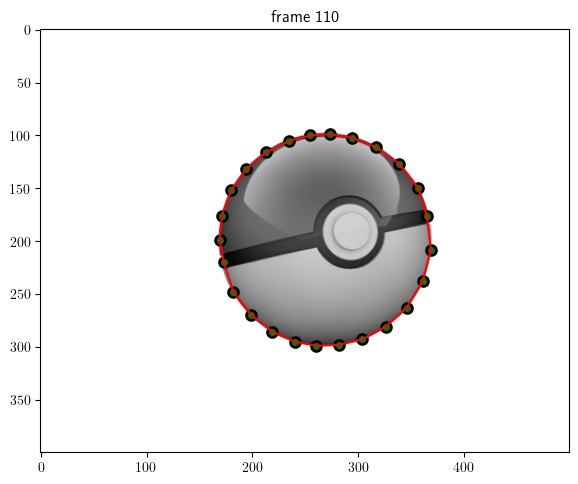

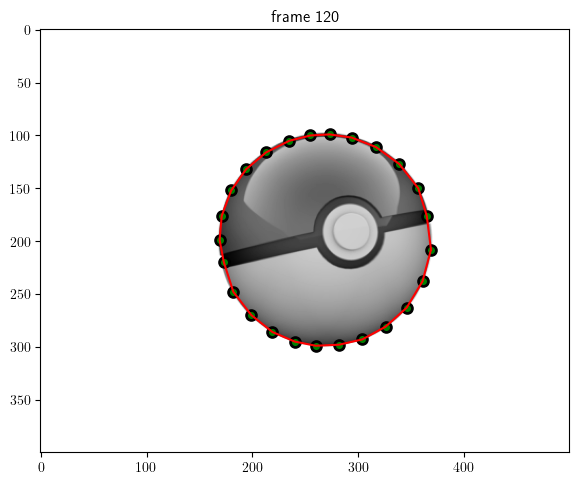

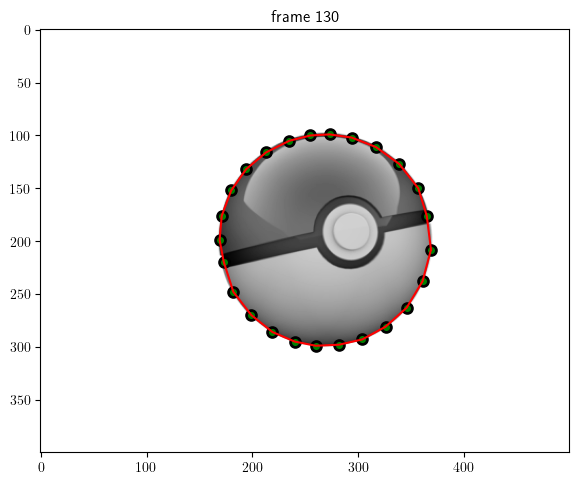

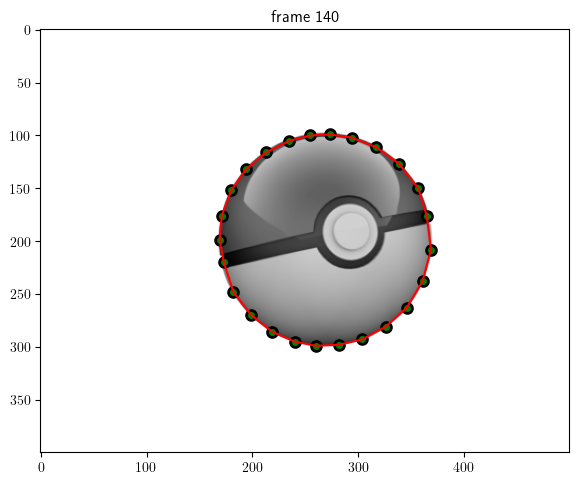

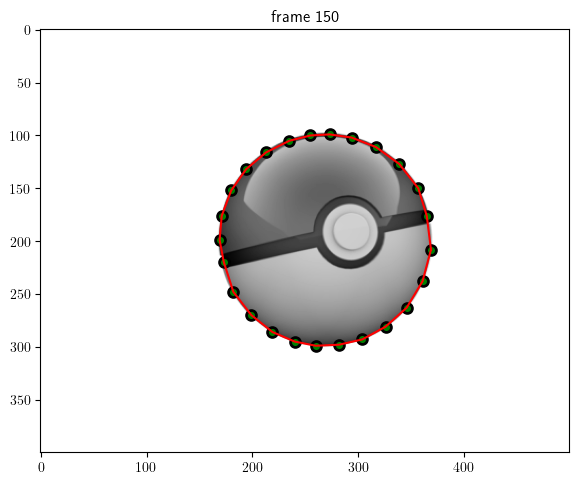

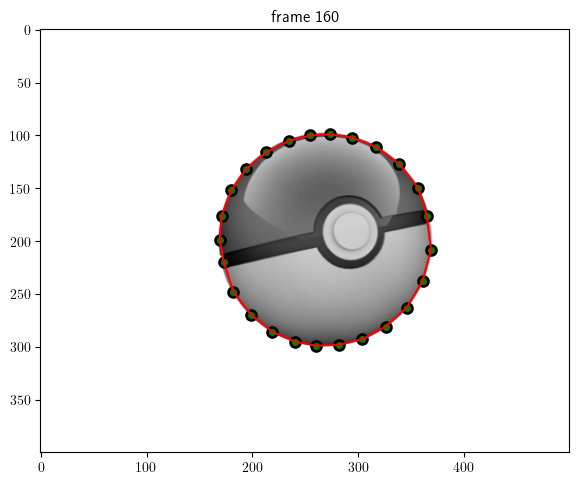

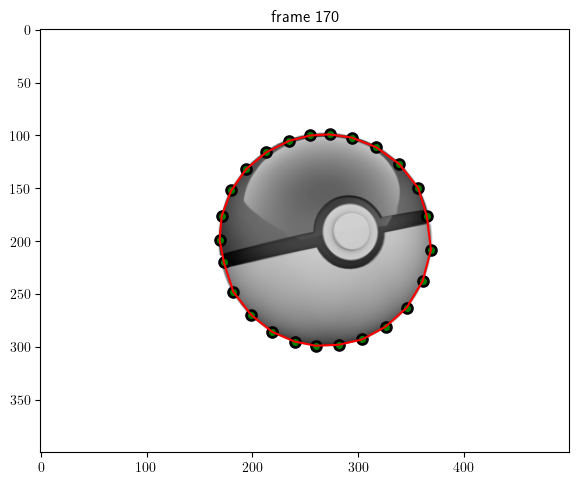

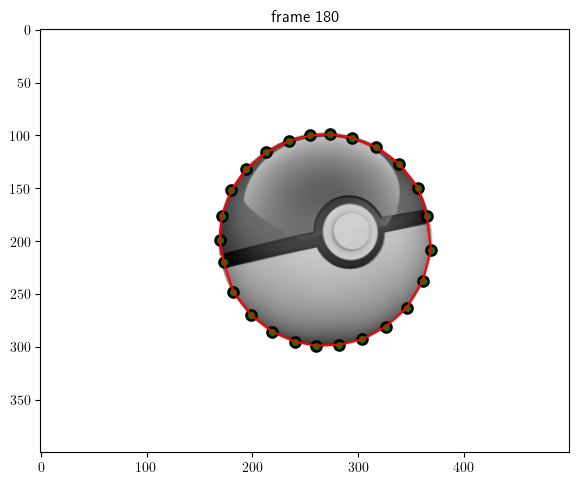

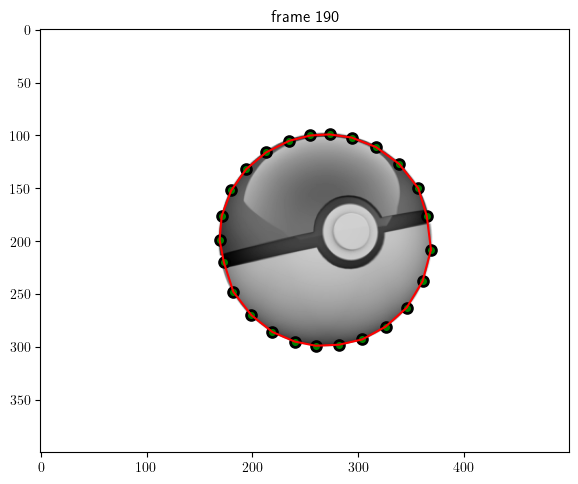

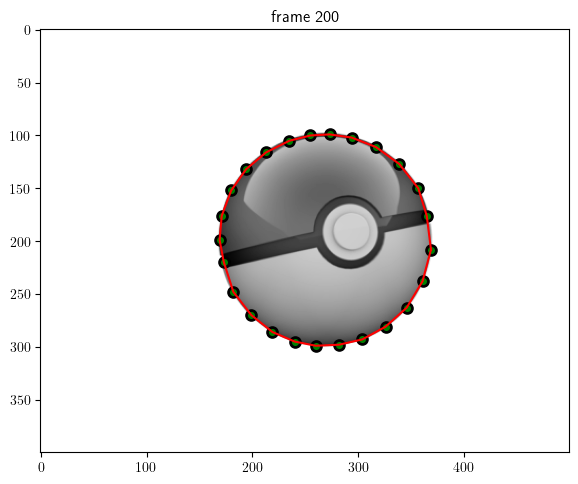

In [122]:
run('images/ball.png', radius=120)

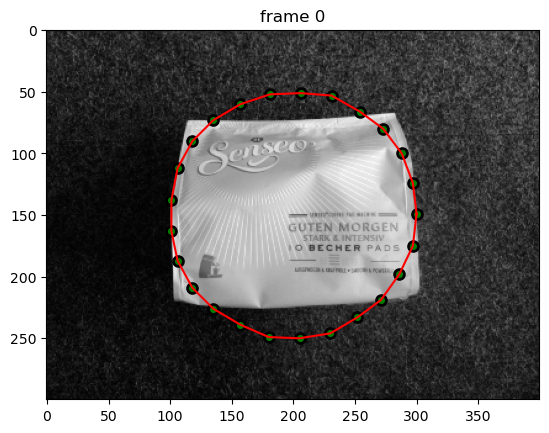

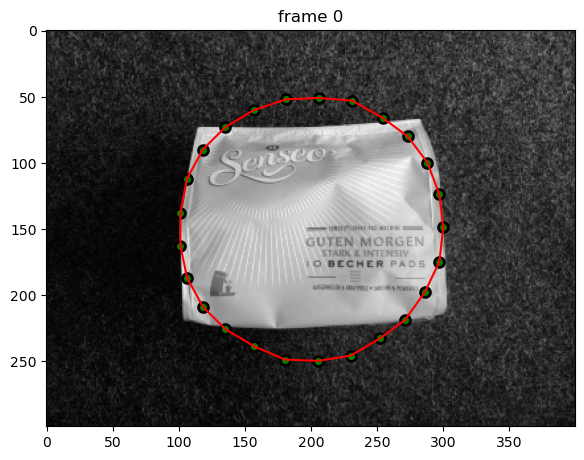

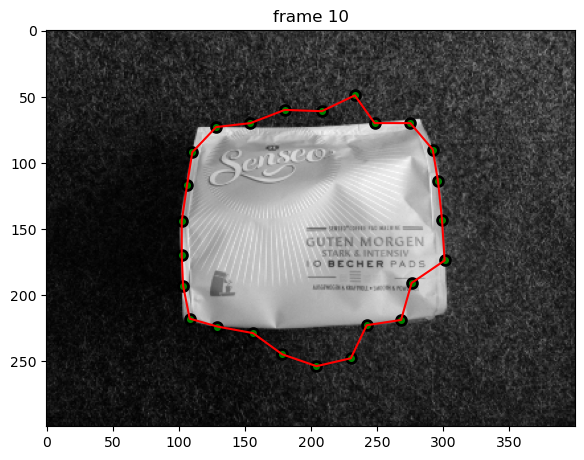

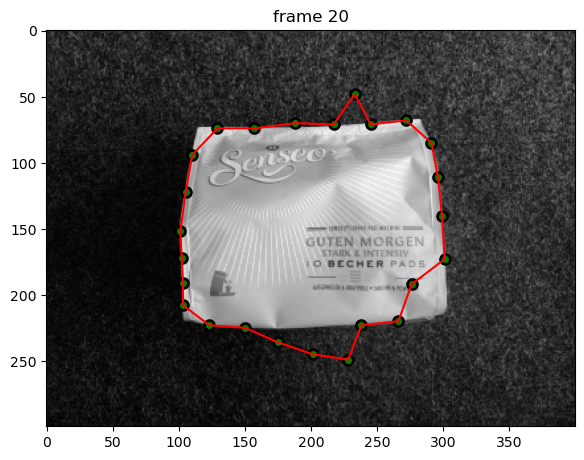

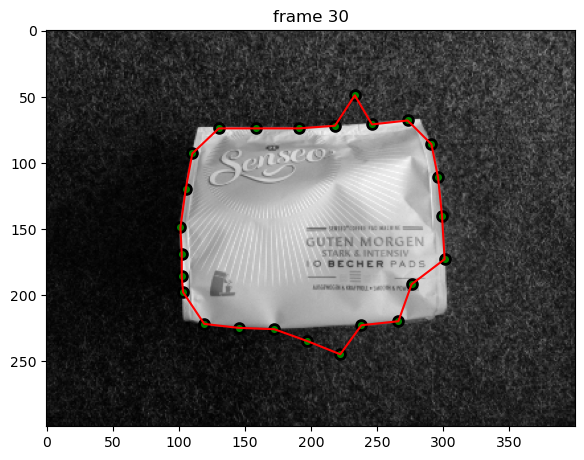

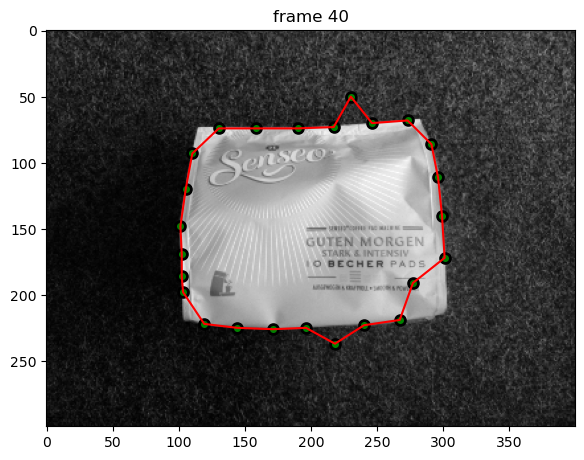

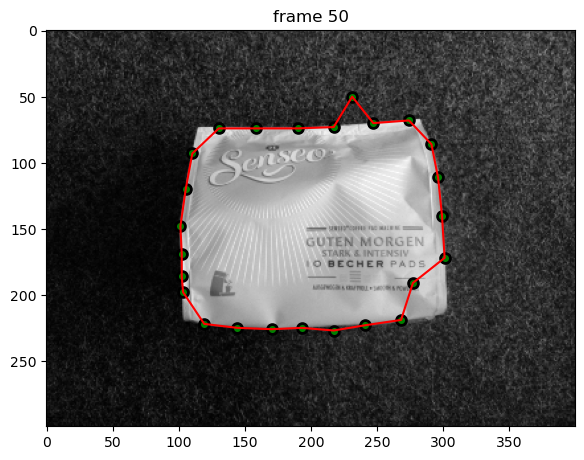

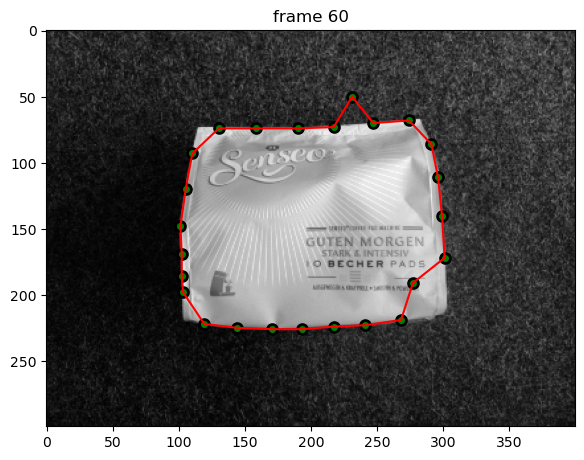

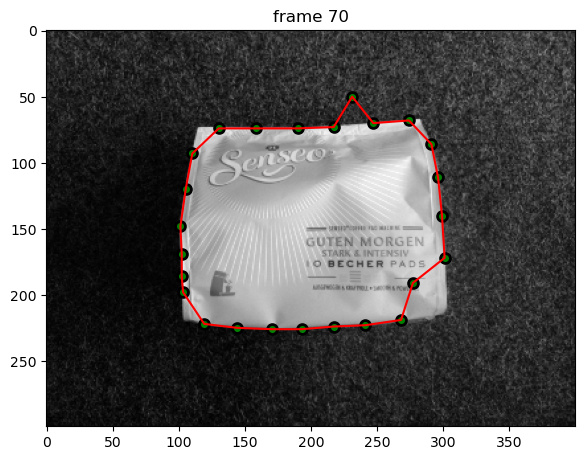

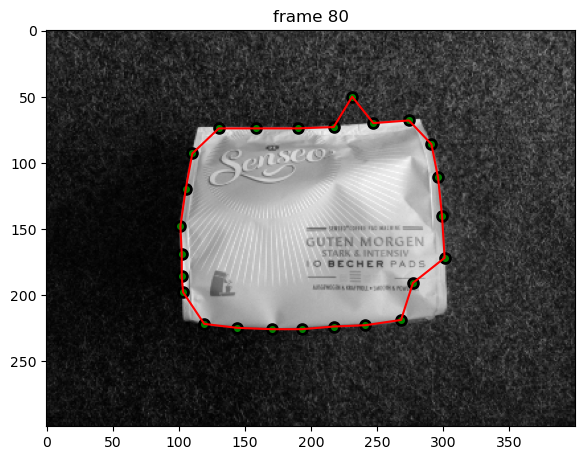

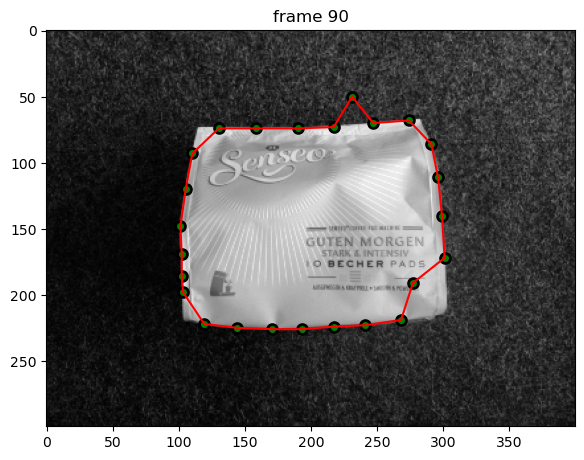

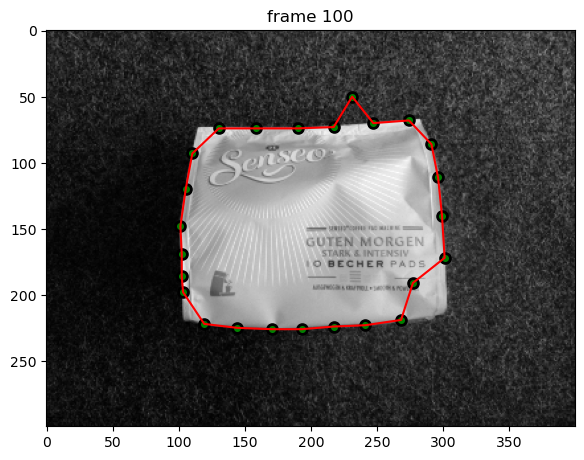

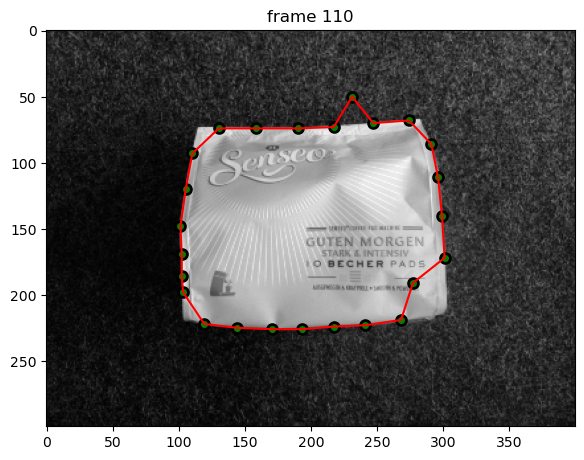

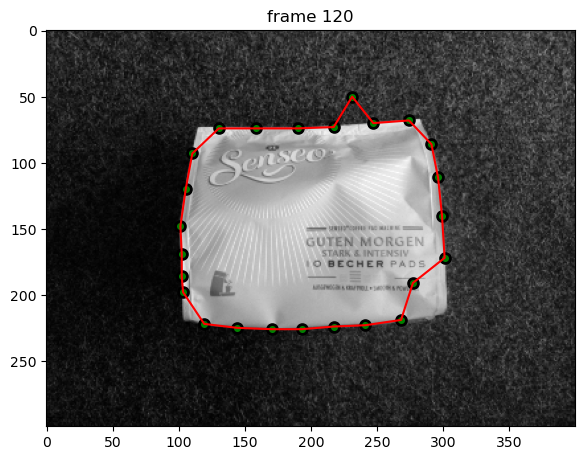

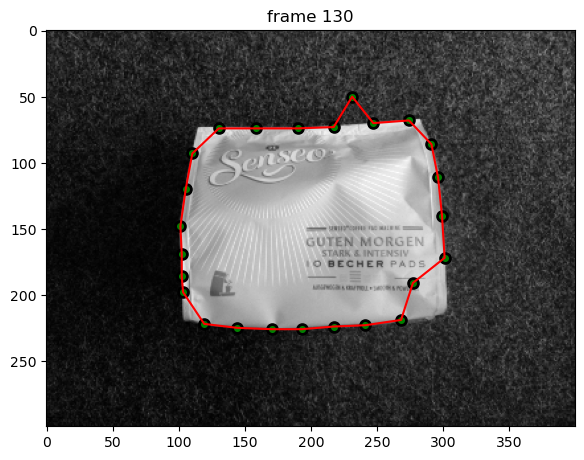

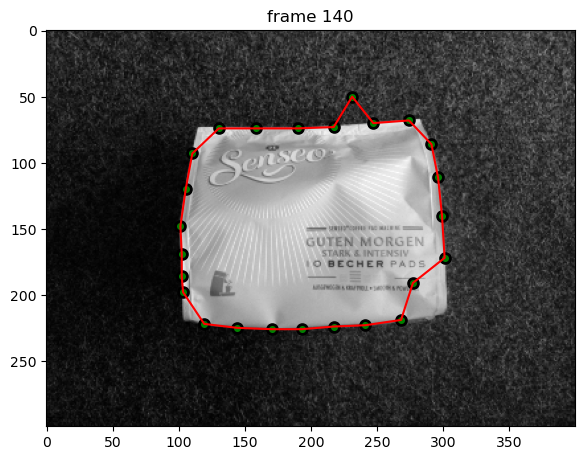

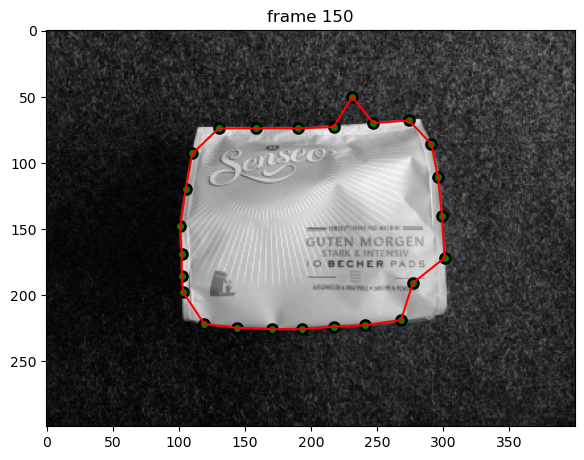

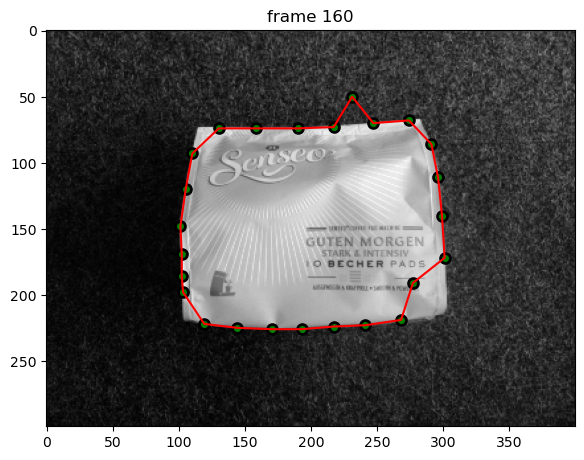

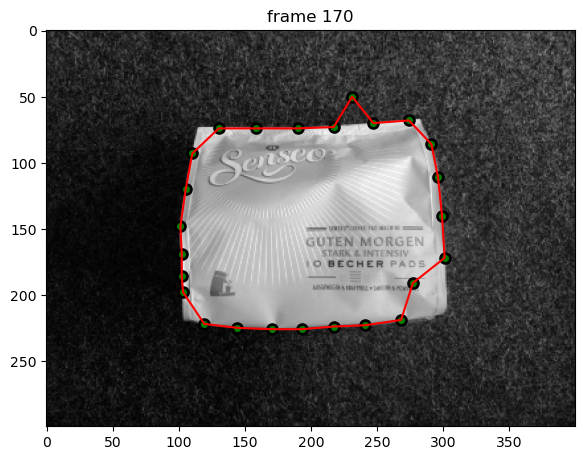

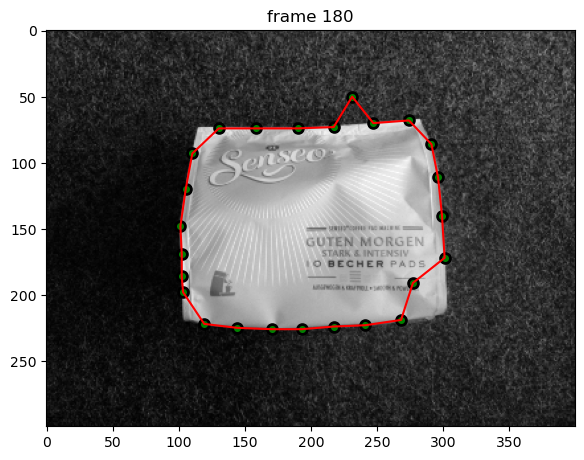

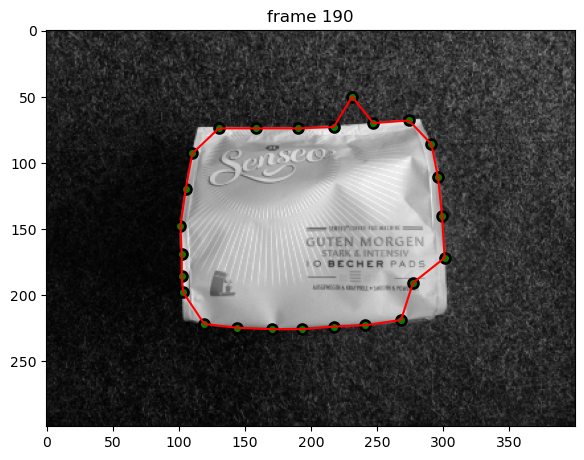

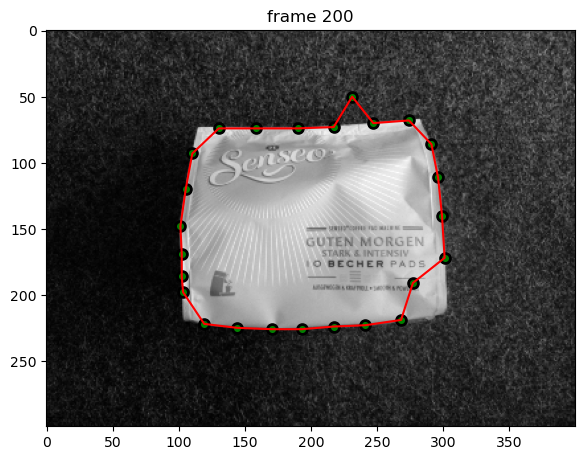

In [112]:
run('images/coffee.png', radius=100)

## Task 2

Read the imageball.png, resize it to half the size, and segment the object in theimage using level-sets with an geodesic active contour. Initialize the contour by acircle around the object and compute a signed distance transform to initialize thelevel-set function. Optimize the geodesic contour by gradient descent. Visualize forthe image how the level-set function changes and how the contour converges to theboundary of the object.